<a href="https://colab.research.google.com/github/AbrarMahmud/Thesis_basic/blob/main/Transformers_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transformers

An automatic speech recognition model takes audio as input. To be able to use a transformer for ASR, we first need to convert the audio into a sequence of embedding vectors

Raw waveform is first normalized to zero mean and unit variance, which helps to standardize audio samples across different volumes (amplitudes).

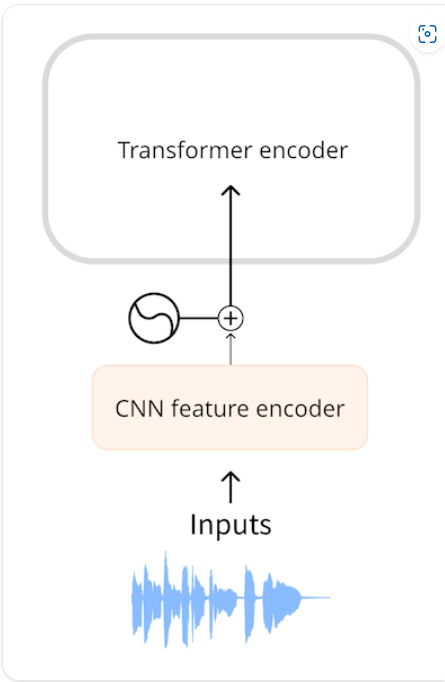

After normalizing, the sequence of audio samples is turned into an embedding using a small convolutional neural network, known as the feature encoder. Each of the convolutional layers in this network processes the input sequence, subsampling the audio to reduce the sequence length, until the final convolutional layer outputs a 512-dimensional vector with the embedding for each 25 ms of audio.**One downside of using the raw waveform as input is that they tend to have long sequence lengths.**

